<a href="https://colab.research.google.com/github/TabuncicValeria/my_projects/blob/main/TABUNCIC_Valeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ETAPA 1 : IDENTIFICAREA SETULUI DE DATE
import pandas as pd
import seaborn as sns
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
import pandas as pd
import seaborn as sns
# Am ales dataset-ul 'planets' disponibil in Seaborn
df_planets=sns.load_dataset('planets')
df_prep=df_planets[['method','number','orbital_period','mass','distance','year']].copy()
print("Planets DataFrame Head: ")
print(df_planets.head(50))

Planets DataFrame Head: 
                       method  number  orbital_period     mass  distance  year
0             Radial Velocity       1      269.300000   7.1000     77.40  2006
1             Radial Velocity       1      874.774000   2.2100     56.95  2008
2             Radial Velocity       1      763.000000   2.6000     19.84  2011
3             Radial Velocity       1      326.030000  19.4000    110.62  2007
4             Radial Velocity       1      516.220000  10.5000    119.47  2009
5             Radial Velocity       1      185.840000   4.8000     76.39  2008
6             Radial Velocity       1     1773.400000   4.6400     18.15  2002
7             Radial Velocity       1      798.500000      NaN     21.41  1996
8             Radial Velocity       1      993.300000  10.3000     73.10  2008
9             Radial Velocity       2      452.800000   1.9900     74.79  2010
10            Radial Velocity       2      883.000000   0.8600     74.79  2010
11            Radial Veloci

Analizând setul de date respectiv am constatat următoarele aspecte :

1.Există numeroase valori lipsă în coloane precum ”mass” , ”orbital_period” sau ”distance”;

2.Există outlieri (valori aberante) în coloane precum : ”orbital_period”,”mass”,”distance”;

3.Coloana ”method” este categorica nominală => One-Hot Encoding

In [ ]:
#ETAPA 2 : PREPROCESAREA DATELOR
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
#IDENTIFICAM NR VALORILOR LIPSA
#SELECTAM COLOANELE SPRE PREPROCESARE

print("DataFrame initial pentru preprocesare : ")
print(df_prep.head())
print()
print(df_prep.isnull().sum())

DataFrame initial pentru preprocesare : 
            method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


In [ ]:
#TRATAM VALORILE LIPSA
for col in ['orbital_period', 'mass', 'distance']:
    median_value = df_prep[col].median()
    df_prep[col].fillna(median_value, inplace=True)
print("DataFrame după tratarea NaN-urilor:")
print(df_prep.head(100))
print(df_prep.isnull().sum())

DataFrame după tratarea NaN-urilor:
             method  number  orbital_period   mass  distance  year
0   Radial Velocity       1      269.300000   7.10     77.40  2006
1   Radial Velocity       1      874.774000   2.21     56.95  2008
2   Radial Velocity       1      763.000000   2.60     19.84  2011
3   Radial Velocity       1      326.030000  19.40    110.62  2007
4   Radial Velocity       1      516.220000  10.50    119.47  2009
..              ...     ...             ...    ...       ...   ...
95          Transit       1        4.037896   1.26     55.25  2009
96          Transit       1        8.886593   1.26     55.25  2009
97          Transit       2        0.853585   1.26    150.00  2009
98  Radial Velocity       2        3.698000   1.26    150.00  2009
99          Transit       1        6.212290   1.26    380.00  2010

[100 rows x 6 columns]
method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64


/tmp/ipython-input-13-3241424309.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep[col].fillna(median_value, inplace=True)


In [ ]:
#IDENTIFICAM OUTLIERILOR => IQR RULE

Calculate the IQR: The IQR is calculated as Q3 - Q1, where Q1 is the 25th percentile (first quartile) and Q3 is the 75th percentile (third quartile) of the data.

Determine the outlier boundaries:

Lower bound: Q1 - (1.5 * IQR)

Upper bound: Q3 + (1.5 * IQR)

Identify outliers: Any data point that falls below the lower bound or above the upper bound is considered an outlier.

In [ ]:
for col in['number','orbital_period','mass','distance','year']:
  Q1=df_prep[col].quantile(0.25)
  Q3=df_prep[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=df_prep[(df_prep[col]<lower_bound)|(df_prep[col]>upper_bound)]
  print(f'Outliers for {col}:{len(outliers)}')

Outliers for number:93
Outliers for orbital_period:138
Outliers for mass:510
Outliers for distance:164
Outliers for year:32


In [ ]:
#TRATAM OUTLIERII PRIN CAPARE (WINSORIZATION - INLOCUIREA CU O VALOARE LIMITA)
for col in ['number', 'orbital_period', 'mass', 'distance', 'year']:
    lower_bound = df_prep[col].quantile(0.05)
    upper_bound = df_prep[col].quantile(0.95)
    print(f"{col}: lower={lower_bound:.3f}, upper={upper_bound:.3f}")

    df_prep[col] = np.where(df_prep[col]<lower_bound, lower_bound, df_prep[col])
    df_prep[col] = np.where(df_prep[col]>upper_bound, upper_bound, df_prep[col])

print("Datele dupa Winsorization:")
print(df_prep.describe())

number: lower=1.000, upper=5.000
orbital_period: lower=1.950, upper=3306.300
mass: lower=0.034, upper=7.279
distance: lower=12.830, upper=885.000
year: lower=2001.000, upper=2013.300
Datele dupa Winsorization:
            number  orbital_period         mass     distance         year
count  1035.000000     1035.000000  1035.000000  1035.000000  1035.000000
mean      1.748792      481.959768     1.702819   148.202357  2009.168696
std       1.118979      879.546236     1.737482   224.295911     3.555178
min       1.000000        1.949901     0.034400    12.830000  2001.000000
25%       1.000000        5.747860     1.260000    38.010000  2007.000000
50%       1.000000       39.979500     1.260000    55.250000  2010.000000
75%       2.000000      487.100000     1.260000   130.720000  2012.000000
max       5.000000     3306.300000     7.279020   885.000000  2013.300000


In [ ]:
#TRATAM PRIN ONE-HOT-ENCODING COLOANA 'method' => VOM CREEA O COLOANA PENTRU FIECARE CATEGORIE
df_prep = pd.get_dummies(df_prep, columns=['method'], prefix='method', drop_first=True)

print("Datele dupa One-Hot Encoding:")
print(df_prep.head())

Datele dupa One-Hot Encoding:
   number  orbital_period  ...  method_Transit  method_Transit Timing Variations
0     1.0         269.300  ...           False                             False
1     1.0         874.774  ...           False                             False
2     1.0         763.000  ...           False                             False
3     1.0         326.030  ...           False                             False
4     1.0         516.220  ...           False                             False

[5 rows x 14 columns]


In [ ]:
print('Setul de date preprocesat')
print(df_prep.head())

Setul de date preprocesat
   number  orbital_period  ...  method_Transit  method_Transit Timing Variations
0     1.0         269.300  ...           False                             False
1     1.0         874.774  ...           False                             False
2     1.0         763.000  ...           False                             False
3     1.0         326.030  ...           False                             False
4     1.0         516.220  ...           False                             False

[5 rows x 14 columns]


HISTOGRAMA - DISTRIBUTIA MASEI PLANETELOR


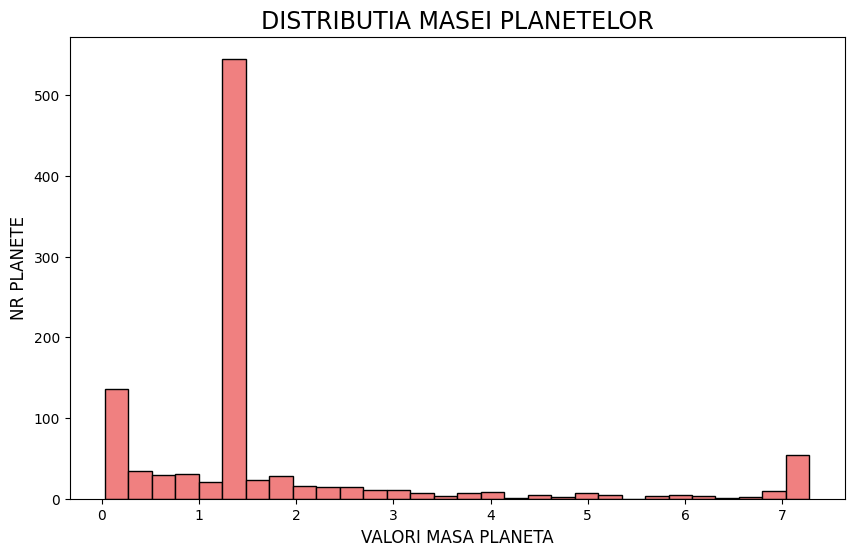

In [ ]:
#ETAPA 3 : VIZUALIZAREA DATELOR

#VIZUALIZAREA DATELOR UTILIZAND BIBLIOTECA MATPLOTLIB
import matplotlib.pyplot as plt

print("HISTOGRAMA - DISTRIBUTIA MASEI PLANETELOR")
plt.figure(figsize=(10,6))
plt.hist(df_prep['mass'],bins=30, color='lightcoral',edgecolor='black')
plt.title('DISTRIBUTIA MASEI PLANETELOR', fontsize=17)
plt.xlabel('VALORI MASA PLANETA',fontsize=12)
plt.ylabel('NR PLANETE',fontsize=12)
plt.show()


Histograma respectivă are drept scop prezentarea distribuției masei planetelor. Observăm că predominant au fost descoperite planete cu mase mici , astfel că vârful este atins în intervalul 1.15-1.5 , unde avem circa 500+ de planete descoperite. În dreapta histogramei remarcăm și prezența câtorva outlieri, pentru că deși preponderent planetele cu mase mari sunt foarte puține, în intervalul 7-7.5 numărul acestora prezintă o creștere semnificativă.

GRAFIC DE DISPERSIE - MASA PLANETA vs DISTANTA FATA DE PAMANT


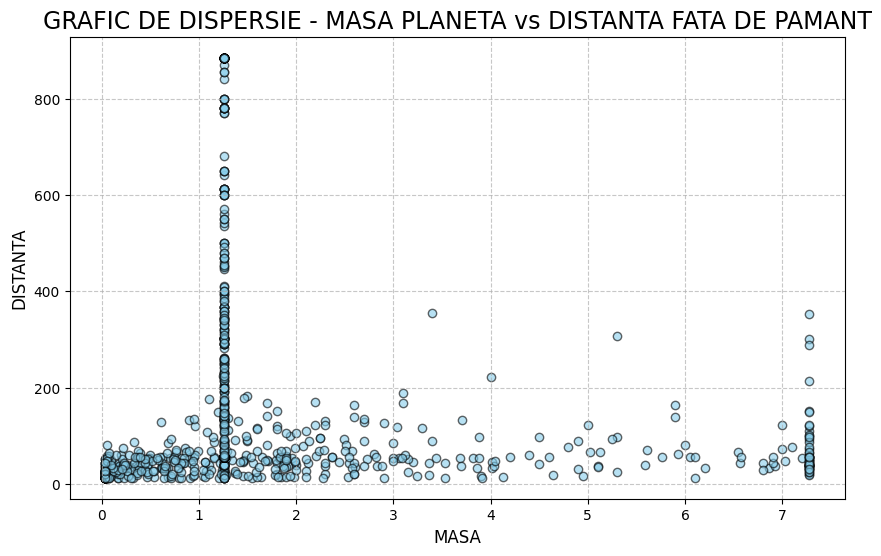

In [ ]:
print('GRAFIC DE DISPERSIE - MASA PLANETA vs DISTANTA FATA DE PAMANT')
plt.figure(figsize=(10,6))
plt.scatter(df_prep['mass'],df_prep['distance'], alpha=0.6,color='skyblue', edgecolor='black')
plt.title('GRAFIC DE DISPERSIE - MASA PLANETA vs DISTANTA FATA DE PAMANT',fontsize=17)
plt.xlabel('MASA', fontsize=12)
plt.ylabel('DISTANTA',fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Analizând graficul de dispersie respectiv constatăm că nu există o corelație prea evidentă între mase și distanțe (ba chiar aș tinde să zic că este mai mult inexistentă ) , având în vedere că norul de puncte e foarte dispersat vertical pentru orice valoare a masei. Astfel, predictorul ”distanță” , nu pare să valideze variabilitatea masei ( ceea ce vom demonstra de altfel în cadrul modelului de regresie )

GRAFIC CU BARE : NUMARUL DE PLANETE DESCOPERITE PER METODA 


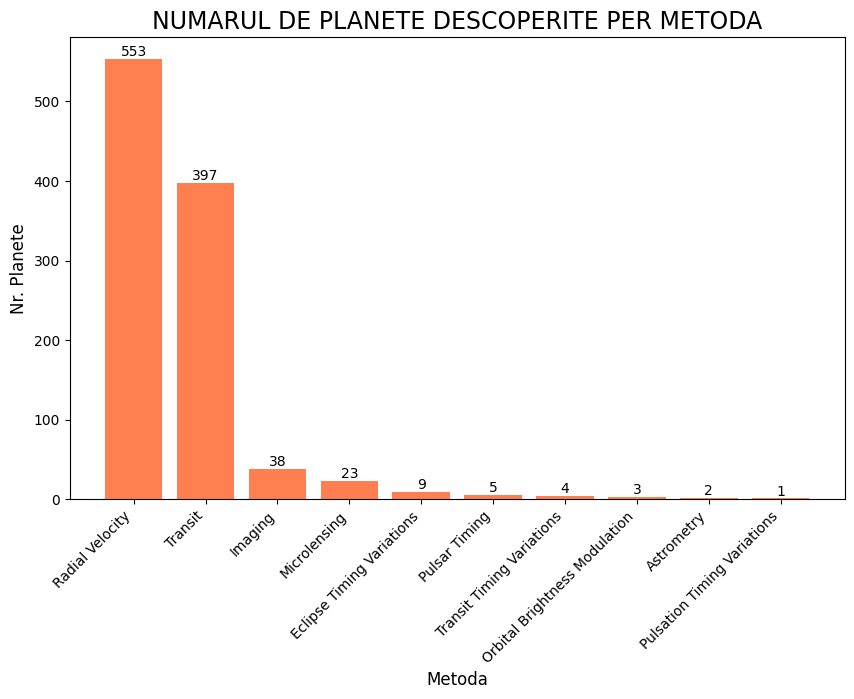

In [ ]:
print("GRAFIC CU BARE : NUMARUL DE PLANETE DESCOPERITE PER METODA ")
method_counts=df_planets['method'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(method_counts.index, method_counts.values, color='coral')
plt.xticks(rotation=45, ha='right')
plt.title('NUMARUL DE PLANETE DESCOPERITE PER METODA', fontsize=17)
plt.xlabel('Metoda', fontsize=12)
plt.ylabel('Nr. Planete', fontsize=12)
#adaugam etichete deasupra barelor
for i, v in enumerate(method_counts.values):
  plt.text(i,v,str(v),ha='center',va='bottom') #i - a cata coloana, v- inaltimea coloanei , str(v) - converisa pt afisare

plt.show()

Observăm că metoda Radial Velocity este cea care a condus la descoperirea celui mai mare număr de planete ( 553) , urmată fiind de metoda Transit cu un scor de 397. Cele mai ineficiente metode s-au dovedit a fi : Orbital Brightness Modulation, Astrometry și Pulsation Timing Variations .


Countplot : Nr planete per Metoda


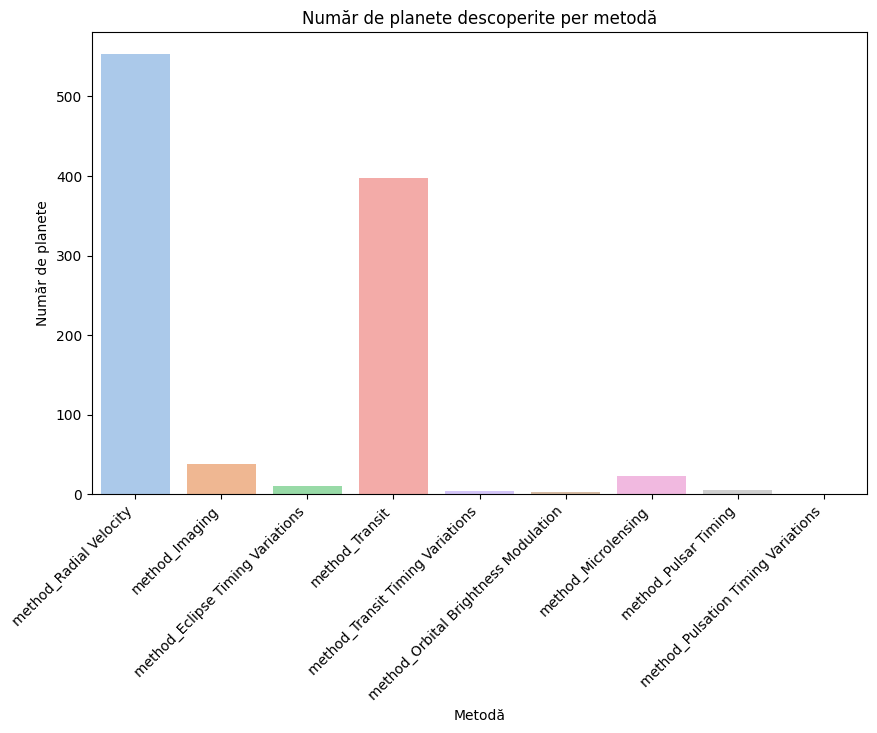

In [ ]:
#analog, pot vizualiza câte planete au fost descoperite per metodă utilizând un Countplot disponibil în biblioteca seaborn
import seaborn as sns
print("Countplot : Nr planete per Metoda")
method_cols=[col for col in df_prep.columns if col.startswith('method_')]
df_prep['method'] = df_prep[method_cols].idxmax(axis=1) #selectez unde am true pentru metoda
plt.figure(figsize=(10,6))
sns.countplot(data=df_prep, x='method',hue='method',palette='pastel', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Număr de planete descoperite per metodă')
plt.xlabel('Metodă')
plt.ylabel('Număr de planete')
plt.show()

Observăm același rezultat, cu specificația că de aceastăă dată categoriile apar în ordinea apariției și nu ordonate în funcție de numărul de planete.

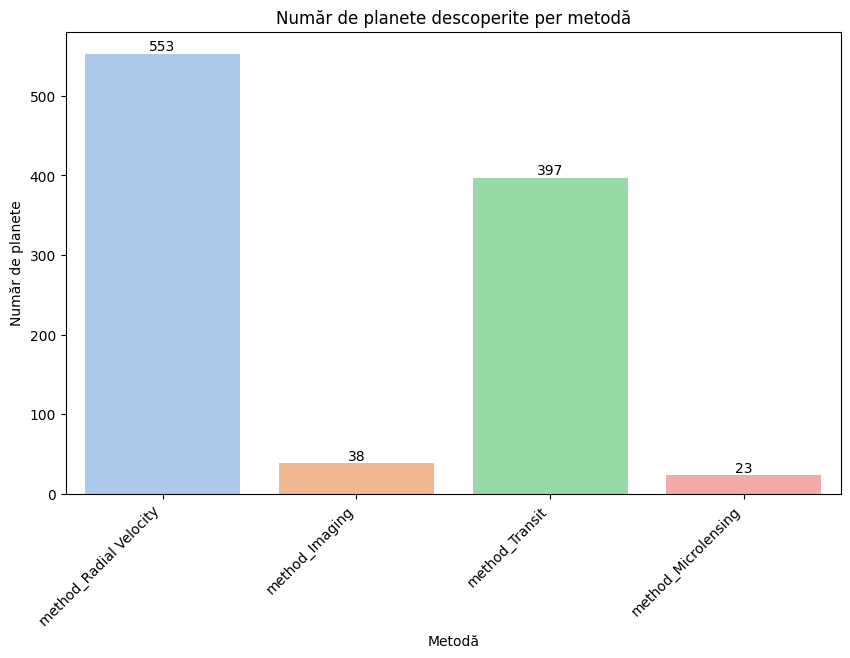

In [ ]:
#CountPlot care va include doar categoriile cu minim 20 de planete descoperite
counts=df_prep['method'].value_counts()
df_filtered=df_prep[df_prep['method'].isin(counts[lambda x:x>=20].index)]
plt.figure(figsize=(10,6))
x=sns.countplot(data=df_filtered, x='method',hue='method',palette='pastel', legend=False)
plt.xticks(rotation=45, ha='right')
plt.title('Număr de planete descoperite per metodă')
plt.xlabel('Metodă')
plt.ylabel('Număr de planete')
#patches - lista de dreptunghiuri
for i in x.patches: #centrul barei, inaltimea barei, inaltimea convertita la int , aliniere orizontal pe centru, aliniaza vertical din varf
  x.text(i.get_x() + i.get_width() / 2,i.get_height(), int(i.get_height()), ha='center',va='bottom')

plt.show()

Distributia masei planetelor in functie de anul descoperirii


/tmp/ipython-input-29-3619106257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_prep, x='year',y='mass',palette='coolwarm')


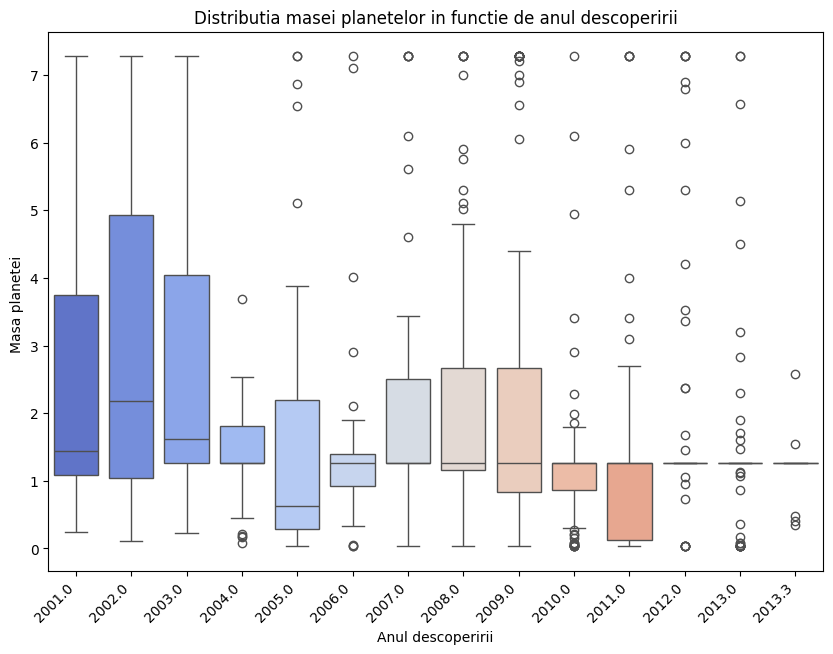

In [ ]:
#BoxPlot : Distributia masei planetelor in functie de anul descoperirii
print("Distributia masei planetelor in functie de anul descoperirii")
plt.figure(figsize=(10,7))
sns.boxplot(data=df_prep, x='year',y='mass',palette='coolwarm')
plt.title("Distributia masei planetelor in functie de anul descoperirii")
plt.xlabel("Anul descoperirii")
plt.ylabel("Masa planetei ")
plt.xticks(rotation=45, ha='right')
plt.show()

Analizând acest BoxPlot observăm că în anii 2001-2003 , medianele masei planetelor sunt mai ridicate ( aprox 2-3) . Ulterior însă observăm o scădere a valorilor masei, ceea ce de fapt ne demonstrează că dacă la început cu preponderență se decopereau planete cu dimensiuni mari, ulterior, poate odată cu accelerarea progresului tehnologic, cercetătorii au reușit să descopere tot mai multe planete mici. Totodată remarcăm că există destul de mulți outlieri în fiecare an.


HEATMAP
Matricea de Corelație (primele 5x5 elemente):
                  number  orbital_period      mass  distance      year
number          1.000000       -0.068510 -0.208279 -0.016845  0.165983
orbital_period -0.068510        1.000000  0.284152 -0.207845 -0.156014
mass           -0.208279        0.284152  1.000000 -0.066444 -0.230422
distance       -0.016845       -0.207845 -0.066444  1.000000  0.240290
year            0.165983       -0.156014 -0.230422  0.240290  1.000000


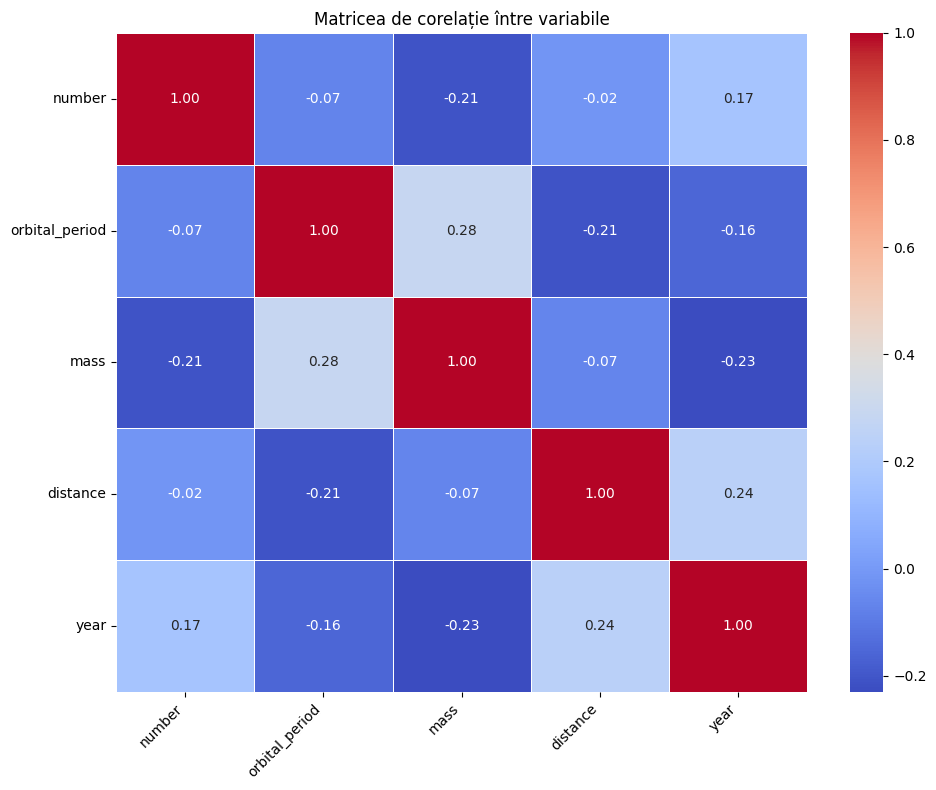

Interpretarea Heatmap-ului
Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.
Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.
Culoare Neutră (spre 0): Corelație slabă sau inexistentă.
Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).
Observați corelațiile puternice cu 'target' pentru a identifica features predictive.


In [ ]:
#HEATMAP
print("HEATMAP")
#PAS 1: Selectia coloanelor
cols_numeric = ['number','orbital_period', 'mass', 'distance', 'year']
#PAS 2: Calcularea matricei de corelatie
correlation_matrix=df_prep[cols_numeric].corr();
print("Matricea de Corelație (primele 5x5 elemente):")
print(correlation_matrix.iloc[:5, :5])
#PAS 3: Crearea Heatmap-ului Corelatiilor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidths=.5,cbar=True)
plt.title("Matricea de corelație între variabile")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Interpretarea Heatmap-ului")
print("Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.")
print("Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.")
print("Culoare Neutră (spre 0): Corelație slabă sau inexistentă.")
print("Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).")
print("Observați corelațiile puternice cu 'target' pentru a identifica features predictive.")


HEATMAP
Matricea de Corelație (primele 5x5 elemente):
                  number  orbital_period      mass  log_mass  distance
number          1.000000       -0.068510 -0.208279 -0.249460 -0.016845
orbital_period -0.068510        1.000000  0.284152  0.295145 -0.207845
mass           -0.208279        0.284152  1.000000  0.942537 -0.066444
log_mass       -0.249460        0.295145  0.942537  1.000000  0.019108
distance       -0.016845       -0.207845 -0.066444  0.019108  1.000000


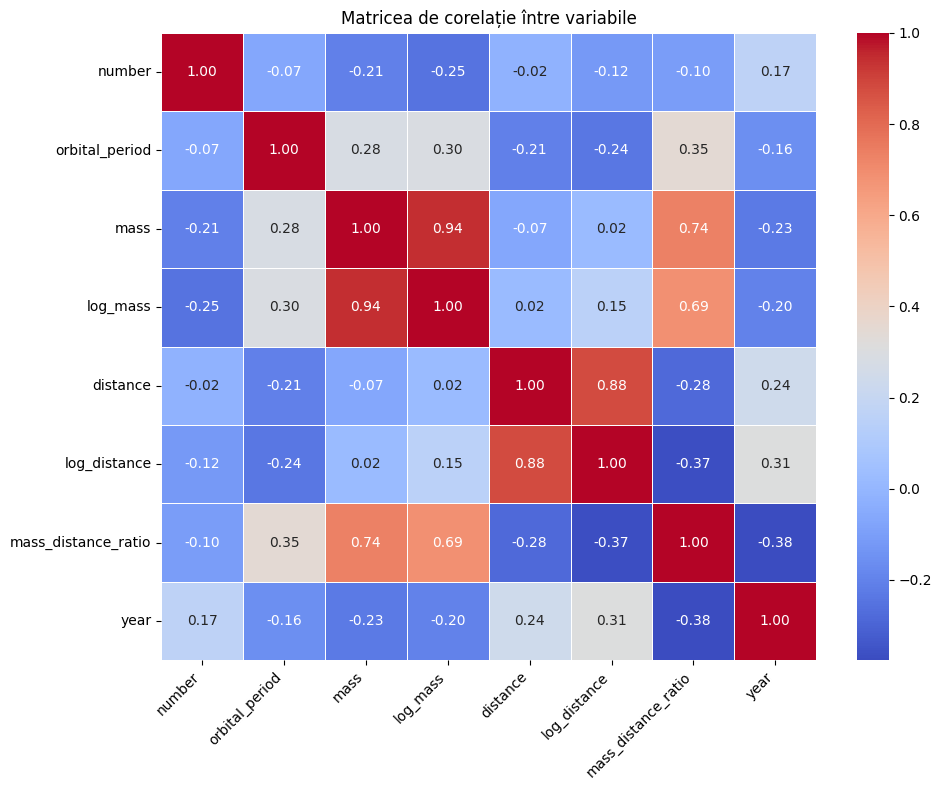

Interpretarea Heatmap-ului
Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.
Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.
Culoare Neutră (spre 0): Corelație slabă sau inexistentă.
Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).


In [ ]:
#Analizând heatmap-ul respectiv constatăm că corelațiile între variabile sunt slabe sau chiar inexistente,
#predominante fiind culorile neutre și albastru închis.
#Totuși în intenția de a prezenta inclusiv situația în care între variabile există diverse corelații, vom introduce
#artificial o serie de variabile

#log transformari
df_prep['log_mass'] = np.log1p(df_prep['mass'])
df_prep['log_distance'] = np.log1p(df_prep['distance'])
#raport masa/distanta
df_prep['mass_distance_ratio'] = df_prep['mass'] / (df_prep['distance'] + 1e-5) #pentru a evita impartirea la 0

print("HEATMAP")
#PAS 1: Selectia coloanelor
cols_noi = ['number','orbital_period', 'mass', 'log_mass', 'distance','log_distance', 'mass_distance_ratio','year']
#PAS 2: Calcularea matricei de corelatie
correlation_matrix=df_prep[cols_noi].corr();
print("Matricea de Corelație (primele 5x5 elemente):")
print(correlation_matrix.iloc[:5, :5])
#PAS 3: Crearea Heatmap-ului Corelatiilor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidths=.5,cbar=True)
plt.title("Matricea de corelație între variabile")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Interpretarea Heatmap-ului")
print("Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.")
print("Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.")
print("Culoare Neutră (spre 0): Corelație slabă sau inexistentă.")
print("Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).")


Acum , putem observa corelațiile pozitive puternice existe între variabile precum mass și log_mass, distance și log_distance.

In [ ]:
#PREDICTIE - MASA PLANETELOR - REGRESIE LINIARA SIMPLA
#PAS 1. DEFINIM X(features) și Y(target)

df_prep['method_numeric']=df_prep['method'].astype('category').cat.codes

print("Definirea X (Features) și Y (mass)")
X = df_prep[['distance', 'orbital_period', 'year', 'method_numeric']] #var numerice utilizate pentru realizarea predictiei
Y=df_prep['mass'] #ce vrem sa prezicem
X = X.fillna(X.mean()) #am mai tratat odata valorile lipsa, pentru ca probabil la o anumita selectie au mai reaparut valori NAN
print(f"Dimensiunea inițială a X (features): {X.shape}")
print(f"Dimensiunea inițială a y (mass): {Y.shape}")

Definirea X (Features) și Y (mass)
Dimensiunea inițială a X (features): (1035, 4)
Dimensiunea inițială a y (mass): (1035,)


In [ ]:
#scalarea
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datele au fost scalate.")
print(f"Forma X_scaled: {X_scaled.shape}")

Datele au fost scalate.
Forma X_scaled: (1035, 4)


In [ ]:
from sklearn.model_selection import train_test_split
#Pas 2 : Impartim datele in X_train, X_test, Y_train, Y_test
print("Împărțirea datelor în seturi de antrenament și testare")
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size=0.2, random_state=42)

print(f"Dimensiunea setului de antrenament (X_train, Y_train): {X_train.shape}, {Y_train.shape}")
print(f"Dimensiunea setului de testare (X_test, Y_test): {X_test.shape}, {Y_test.shape}")

Împărțirea datelor în seturi de antrenament și testare
Dimensiunea setului de antrenament (X_train, Y_train): (828, 4), (828,)
Dimensiunea setului de testare (X_test, Y_test): (207, 4), (207,)


In [ ]:
from sklearn.linear_model import LinearRegression
#Pas 3: Creem si antrenam un model de Linear Regression
print("Crearea și antrenarea modelului LinearRegression")
model = LinearRegression()
model.fit(X_train, Y_train)

print("Modelul de regresie liniară a fost antrenat.")
# Afișăm coeficienții modelului și intercepția
print(f"Coeficienții modelului (pentru fiecare feature): {model.coef_}")
print(f"Intercepția modelului: {model.intercept_}")

Crearea și antrenarea modelului LinearRegression
Modelul de regresie liniară a fost antrenat.
Coeficienții modelului (pentru fiecare feature): [ 0.03555817  0.49093931 -0.35724541  0.20400809]
Intercepția modelului: 1.7035323203686903


In [ ]:
#Pas 4 : Realizam predictii pe X_test
Y_pred=model.predict(X_test)
print("Primele 5 valori reale din setul de testare (Y_test):")
print(Y_test.head().values)
print("Primele 5 predicții ale modelului (Y_pred):")
print(Y_pred[:5])

Primele 5 valori reale din setul de testare (Y_test):
[7.27902 7.2     7.27902 0.036   0.15   ]
Primele 5 predicții ale modelului (Y_pred):
[2.04494787 3.11098277 2.41693629 1.1435131  1.3935657 ]


In [ ]:
#Pas 5: Calculam si afisam MAE, MSE, RMSE si R24
from sklearn import metrics
print("Evaluarea Modelului de Regresie Liniară")
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(Y_test, Y_pred):.4f}')
print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(Y_test, Y_pred):.4f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)):.4f}')
print(f'R-squared (R2): {metrics.r2_score(Y_test, Y_pred):.4f}')

Evaluarea Modelului de Regresie Liniară
Mean Absolute Error (MAE): 0.9794
Mean Squared Error (MSE): 2.4033
Root Mean Squared Error (RMSE): 1.5503
R-squared (R2): 0.1639


În medie modelul greșește predicția masei cu aprox 0.98 unități. Media pătratelor erorilor este de 2,40. (Penalizează cu prioritate erorile mari) . Coeficientul de determinație este de 0.1632 , ceea ce ne arată că modelul explică doar în proporție de 16% variația maselor . Altfel spus, este un model slab, întrucât predictorii analizați ( distance, orbital_period...) explică foarte puțin variația maselor.

Având în vedere că modelul anterior utilizat s-a dovedit a fi practic ineficient, vom utiliza modelul RandomForestRegressor, în speranța de a îmbunătăți performanța modelului obținut.

A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Trees in the forest use the best split strategy, i.e. equivalent to passing splitter="best" to the underlying DecisionTreeRegressor. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [ ]:
from sklearn.ensemble import  RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
Y_pred_RF=model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Evaluarea Random Forest Regressor")
print(f'Mean Absolute Error (MAE): {metrics.mean_absolute_error(Y_test, Y_pred_RF):.4f}')
print(f'Mean Squared Error (MSE): {metrics.mean_squared_error(Y_test, Y_pred_RF):.4f}')
print(f'Root Mean Squared Error (RMSE): {np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_RF)):.4f}')
print(f'R-squared (R2): {metrics.r2_score(Y_test, Y_pred_RF):.4f}')


Evaluarea Random Forest Regressor
Mean Absolute Error (MAE): 0.9108
Mean Squared Error (MSE): 2.4334
Root Mean Squared Error (RMSE): 1.5599
R-squared (R2): 0.1534


Observăm că nici acest model nu este foarte eficient, ceea ce de fapt ne validează că problema este dată de slaba corelație a predictorilor disponibili cu targetul (masa) . Pentru a modifica situația respectivă, încercăm să efectuăm o transformare logaritmică a masei. Ulterior vom analiza modul în care evoluează performanța modelelor.

In [ ]:
Y_log = np.log1p(Y)
X["log_distance"] = np.log1p(X["distance"])
X["log_orbital_period"] = np.log1p(X["orbital_period"])

In [ ]:
#PREPROCESAREA REPETATA
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, Y_train_log, Y_test_log = train_test_split( X_scaled, Y_log, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train_log)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred_log = model.predict(X_test)
Y_pred = np.expm1(Y_pred_log)
Y_test = np.expm1(Y_test_log)

In [ ]:
print("Evaluare Random Forest cu log-transform și features suplimentare:")
print(f'MAE: {metrics.mean_absolute_error(Y_test, Y_pred):.4f}')
print(f'MSE: {metrics.mean_squared_error(Y_test, Y_pred):.4f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)):.4f}')
print(f'R2: {metrics.r2_score(Y_test, Y_pred):.4f}')

Evaluare Random Forest cu log-transform și features suplimentare:
MAE: 0.7781
MSE: 2.0681
RMSE: 1.4381
R2: 0.2805


Se remarcă o oarecare îmbunătățire, acum coeficientul de determinare fiind de circa 28%. Toutuși această evoluție, care nu se remarcă ca fiind una considerabilă, ne demonstrează că nu există o corelație puternică între date.  Astfel, o să recurgem la adăugarea unor noi variabile, care din punct de vedere logic vor influența masa planetei respective. Variabilele noi adăugate sunt: tipul planetei , temperatura planetei , metalicitatea și proprietățile stelei gazdă.

In [ ]:
#tipul planetei
np.random.seed(42)
df_prep["tip_planeta"] = np.random.choice(["rocky", "gas_giant", "ice_giant"], size=len(df_prep))
#temperatura
df_prep["temperatura_planeta"] = (df_prep["mass"] * 100 + np.random.normal(0, 20, size=len(df_prep)))
#metalicitatea
df_prep["metalicitate"]=(-0.3 + df_prep["mass"] * 0.05 + np.random.normal(0, 0.05, size=len(df_prep)))
#masa stelei gazda
df_prep["masa_stea"]=(0.5 + df_prep["mass"] * 0.1 + np.random.normal(0, 0.05, size=len(df_prep)))
df_prep["raza"]=(0.7 + df_prep["mass"] * 0.05 + np.random.normal(0, 0.02, size=len(df_prep)))



In [ ]:
print(df_prep.head())

   number  orbital_period     mass  distance    year  \
0     1.0         269.300  7.10000     77.40  2006.0   
1     1.0         874.774  2.21000     56.95  2008.0   
2     1.0         763.000  2.60000     19.84  2011.0   
3     1.0         326.030  7.27902    110.62  2007.0   
4     1.0         516.220  7.27902    119.47  2009.0   

   method_Eclipse Timing Variations  method_Imaging  method_Microlensing  \
0                             False           False                False   
1                             False           False                False   
2                             False           False                False   
3                             False           False                False   
4                             False           False                False   

   method_Orbital Brightness Modulation  method_Pulsar Timing  ...  \
0                                 False                 False  ...   
1                                 False                 False  ...

In [ ]:
#Pregatim din nou setul de date
print(df_prep.isnull().sum())

number                                  0
orbital_period                          0
mass                                    0
distance                                0
year                                    0
method_Eclipse Timing Variations        0
method_Imaging                          0
method_Microlensing                     0
method_Orbital Brightness Modulation    0
method_Pulsar Timing                    0
method_Pulsation Timing Variations      0
method_Radial Velocity                  0
method_Transit                          0
method_Transit Timing Variations        0
method                                  0
log_mass                                0
log_distance                            0
mass_distance_ratio                     0
method_numeric                          0
tip_planeta                             0
temperatura_planeta                     0
metalicitate                            0
masa_stea                               0
raza                              

In [ ]:
#one-hot encoding pentru tip_planeta
df_prep = pd.get_dummies(df_prep, columns=["tip_planeta"], drop_first=True)


In [ ]:
print(df_prep.head())

   number  orbital_period  ...  tip_planeta_ice_giant  tip_planeta_rocky
0     1.0         269.300  ...                   True              False
1     1.0         874.774  ...                  False               True
2     1.0         763.000  ...                   True              False
3     1.0         326.030  ...                   True              False
4     1.0         516.220  ...                  False               True

[5 rows x 25 columns]


In [ ]:
#Incercam o noua predictie
X=df_prep[["distance","orbital_period","year","method_numeric","log_distance","log_mass","mass_distance_ratio",
           "temperatura_planeta","metalicitate","masa_stea","raza","tip_planeta_ice_giant","tip_planeta_rocky"]]

In [ ]:
#targetul
Y_log = np.log1p(df_prep["mass"])

In [ ]:
X = X.fillna(X.mean())

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train_log, Y_test_log = train_test_split(X_scaled, Y_log, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, Y_train_log)

Y_pred_log = model.predict(X_test)
Y_pred = np.expm1(Y_pred_log)
Y_test = np.expm1(Y_test_log)


In [ ]:
from sklearn import metrics

print("Evaluare Random Forest cu toate variabilele noi:")
print(f'MAE: {metrics.mean_absolute_error(Y_test, Y_pred):.4f}')
print(f'MSE: {metrics.mean_squared_error(Y_test, Y_pred):.4f}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)):.4f}')
print(f'R2: {metrics.r2_score(Y_test, Y_pred):.4f}')


Evaluare Random Forest cu toate variabilele noi:
MAE: 0.0092
MSE: 0.0007
RMSE: 0.0267
R2: 0.9998


In [ ]:
#Observăm că adăugarea unor noi variabile a condus la maximizarea performanței modelului, astfel că acum coeficientul de determinare a ajuns la 99,98%.

HEATMAP
Matricea de Corelație (primele 5x5 elemente):
                  number  orbital_period      mass  distance      year
number          1.000000       -0.068510 -0.208279 -0.016845  0.165983
orbital_period -0.068510        1.000000  0.284152 -0.207845 -0.156014
mass           -0.208279        0.284152  1.000000 -0.066444 -0.230422
distance       -0.016845       -0.207845 -0.066444  1.000000  0.240290
year            0.165983       -0.156014 -0.230422  0.240290  1.000000


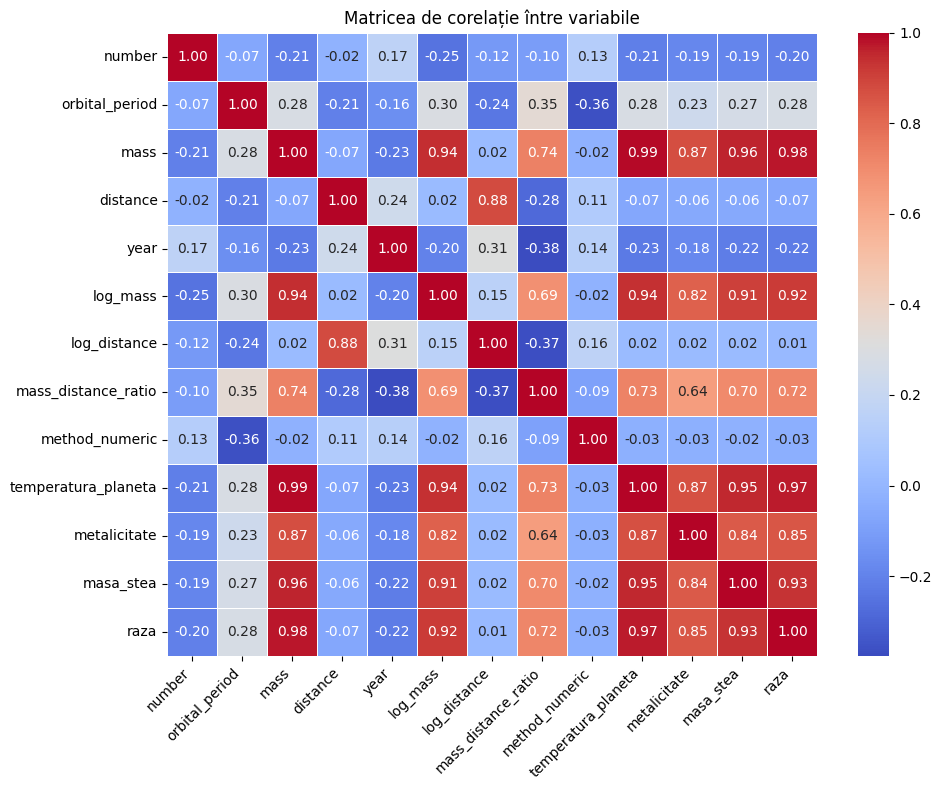

Interpretarea Heatmap-ului
Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.
Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.
Culoare Neutră (spre 0): Corelație slabă sau inexistentă.
Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).


In [ ]:
#Generam un nou Heatmap pentru a pune in evidenta noile corelatii obtinute
print("HEATMAP")
#PAS 1: Selectia coloanelor
col_num = df_prep.select_dtypes(include=[np.number])
#PAS 2: Calcularea matricei de corelatie
correlation_matrix=col_num.corr();
print("Matricea de Corelație (primele 5x5 elemente):")
print(correlation_matrix.iloc[:5, :5])
#PAS 3: Crearea Heatmap-ului Corelatiilor
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f",linewidths=.5,cbar=True)
plt.title("Matricea de corelație între variabile")
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("Interpretarea Heatmap-ului")
print("Culoare Roșie Aprinsă (spre +1): Corelație pozitivă puternică.")
print("Culoare Albastră Aprinsă (spre -1): Corelație negativă puternică.")
print("Culoare Neutră (spre 0): Corelație slabă sau inexistentă.")
print("Diagonala principală este întotdeauna 1.0 (corelația unei variabile cu ea însăși).")

Observăm că adăugarea de noi variabile a condus la formarea unor relații foarte puternice între variabile, astfel că dacă la început observam majoritar culoarea albastră ca fiind predominantă, acum într-o proporție considerabilă au apărut acele pătrățele roșii. De exemplu masa planetei depinde de temperatura acesteia în proporție de 0.99. Acest lucru se întâmplă pentru că la definirea acestor noi variabile am pornit de la masă.

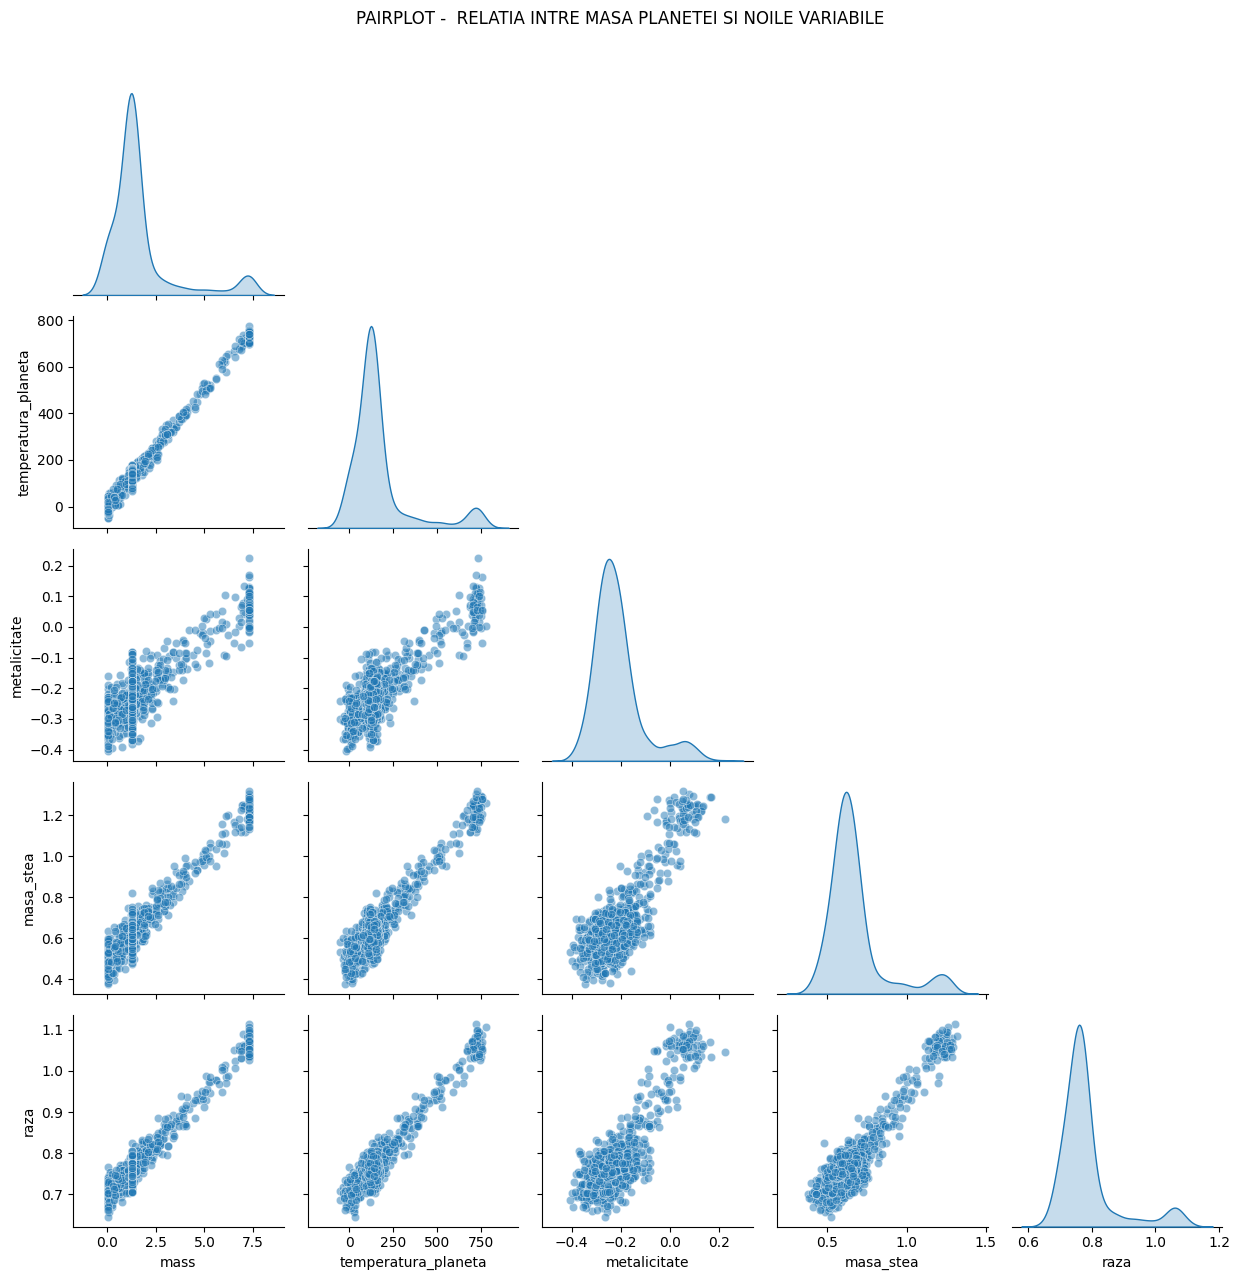

In [ ]:
#ALTE VIZUALIZĂRI
#RELATIA INTRE MASA PLANETEI SI NOILE VARIABILE
pairplot_cols=["mass","temperatura_planeta","metalicitate","masa_stea","raza"]
sns.pairplot(df_prep[pairplot_cols], diag_kind="kde",corner=True, plot_kws={"alpha":0.5}) #kernel density estimate ; puncte transparente 50%
plt.suptitle("PAIRPLOT -  RELATIA INTRE MASA PLANETEI SI NOILE VARIABILE", y=1.02)
plt.tight_layout()
plt.show()


Graficul dintre masă și temperatura planetei apare ca o linie diagonală ascendetă, ceea ce sugerează faptul că creșterea masei este direct proporțională cu creșterea temperaturii. Pentru metalicitate observăm o dispersie mai mare , ceea ce demonstrează că practic relația deși este una pozitivă , este mai slabă. O relație puternică însă vedem pentru masa stelei și masa planetei, analog și pentru rază , aceasta fiind doar puțin mai compactă.  De asemenea, trebuie să subliniem și faptul că masa stelei, raza, temperatura și metalicitatea sunt corelate între ele , mai mult sau mai puțin.

In [ ]:
#XGBoost
X=df_prep[["distance","orbital_period","year","method_numeric","log_distance","log_mass","mass_distance_ratio",
           "temperatura_planeta","metalicitate","masa_stea","raza","tip_planeta_ice_giant","tip_planeta_rocky"]]
Y = df_prep["mass"]

In [ ]:
Y_log = np.log1p(Y)
X = X.fillna(X.mean())


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train_log, Y_test_log = train_test_split(X_scaled, Y_log, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
model_xgb.fit(X_train, Y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
Y_pred_log_xgb = model_xgb.predict(X_test)
Y_pred_xgb = np.expm1(Y_pred_log_xgb)
Y_test_exp = np.expm1(Y_test_log)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Evaluare XGBoost Regressor:")
print(f"MAE: {mean_absolute_error(Y_test_exp, Y_pred_xgb):.4f}")
print(f"MSE: {mean_squared_error(Y_test_exp, Y_pred_xgb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(Y_test_exp, Y_pred_xgb)):.4f}")
print(f"R2: {r2_score(Y_test_exp, Y_pred_xgb):.4f}")


Evaluare XGBoost Regressor:
MAE: 0.0069
MSE: 0.0003
RMSE: 0.0178
R2: 0.9999


Observăm o predicție chiar și mai bună decât în cazul Random Forest


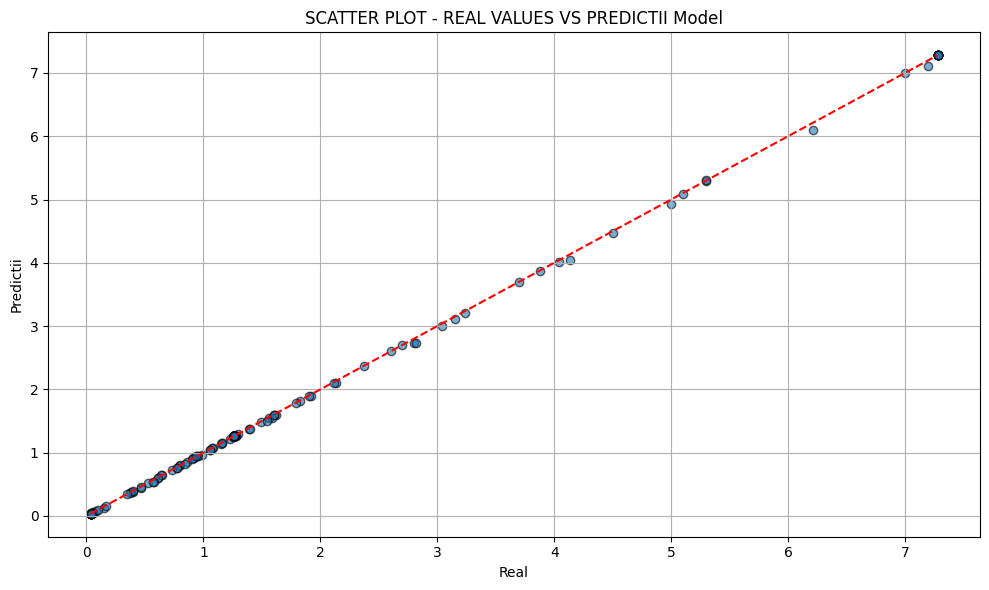

In [ ]:
#SCATTER PLOT - REAL VALUES VS PREDICTII Model
plt.figure(figsize=(10,6))
plt.scatter(Y_test_exp, Y_pred_xgb, alpha=0.6, edgecolors="k")
plt.plot([Y_test_exp.min(), Y_test_exp.max()], [Y_test_exp.min(), Y_test_exp.max()], 'r--')
plt.xlabel("Real")
plt.ylabel("Predictii")
plt.title("SCATTER PLOT - REAL VALUES VS PREDICTII Model")
plt.grid(True)
plt.tight_layout()
plt.show()



Observăm că valorile sunt centrate în jurul diagonalei, aspect care pune în evidență calitatea predicțiilor realizate .

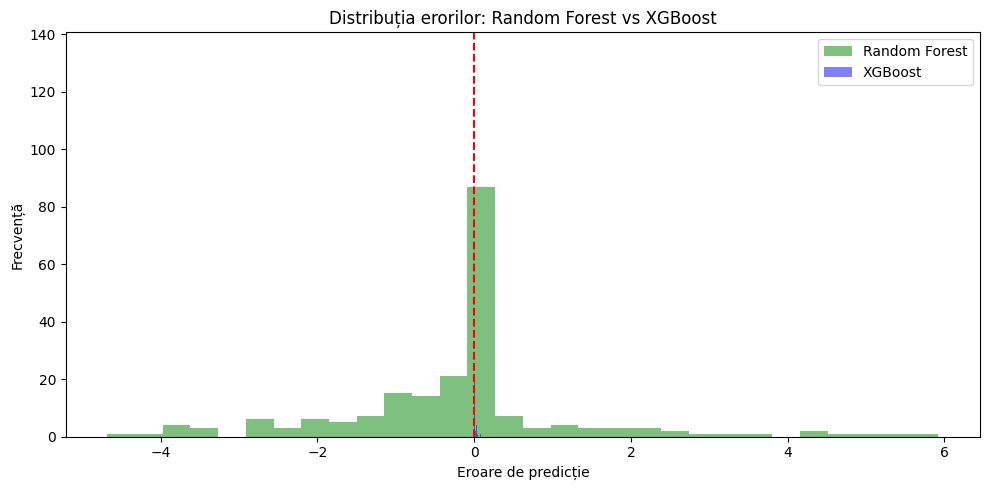

In [ ]:
#HISTOGRAMA -ERORI RandomForest vs XGBoost
err_xgb=Y_test_exp-Y_pred_xgb
err_rf=Y_test_exp-Y_pred_RF

plt.figure(figsize=(10,5))
plt.hist(err_rf, bins=30, alpha=0.5, label="Random Forest", color="green")
plt.hist(err_xgb, bins=30, alpha=0.5, label="XGBoost", color="blue")
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Eroare de predicție")
plt.ylabel("Frecvență")
plt.title("Distribuția erorilor: Random Forest vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

Observăm că ne situăm preponderent în jurul lui 0, ceea ce înseamnă că ambele modele sunt eficiente și nu generează erori în mod sistematic . Pentru modelul Random Forest , evidențiat cu verde , observăm că majoritar efectuează predicții corecte, deși pe alocuri există anumite abateri ( partea stângă). Modelul XGBoost (albastru) pare însă să fie umbrit de RandomForest

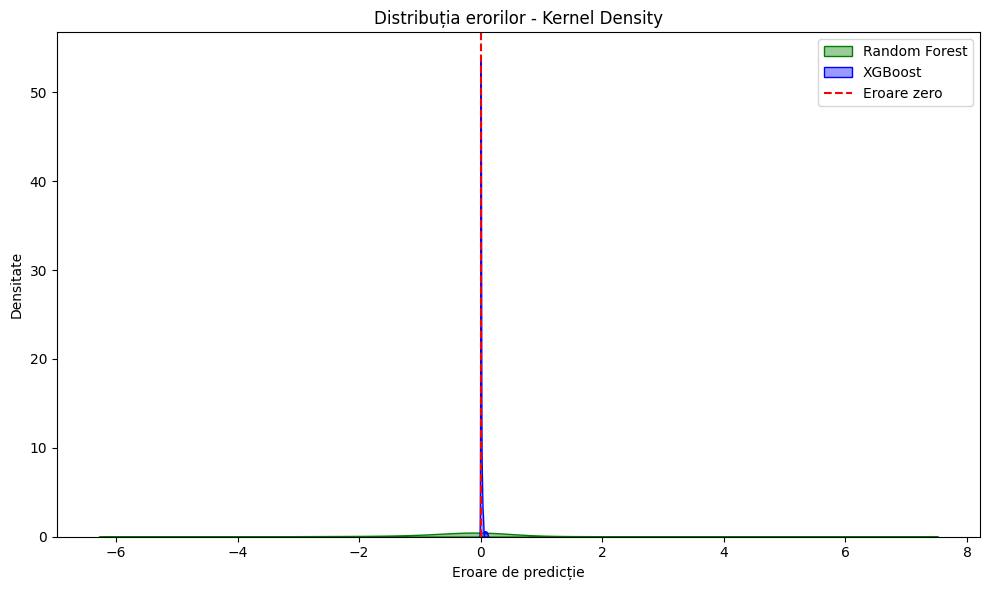

In [ ]:
#Pentru a pune în evidență mai bine gestionarea erorilor în ambele modele, am recurs la realizarea unui Kernel Density Plot
err_xgb=Y_test_exp-Y_pred_xgb
err_rf=Y_test_exp-Y_pred_RF

plt.figure(figsize=(10,6))
sns.kdeplot(err_rf, label="Random Forest", fill=True, alpha=0.4, color="green")
sns.kdeplot(err_xgb, label="XGBoost", fill=True, alpha=0.4, color="blue")
plt.axvline(0, color="red", linestyle="--", label="Eroare zero")
plt.xlabel("Eroare de predicție")
plt.ylabel("Densitate")
plt.title("Distribuția erorilor - Kernel Density")
plt.legend()
plt.tight_layout()
plt.show()